In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
ds = xr.concat(
    [
        xr.open_zarr(
            f"/pscratch/sd/t/timothys/p2/perturbation/inference.{experiment}.diagnostics.zarr",
        ).expand_dims(
            {
                "experiment": [experiment],
            },
        )
        for experiment in ["noobs", "singleobs"]
    ],
    dim="experiment",
)

In [4]:
pds = xr.concat(
    [
        xr.open_zarr(
            f"/pscratch/sd/t/timothys/p2/perturbation/inference.{experiment}.diagnostics.interpolated.zarr",
        ).expand_dims(
            {
                "experiment": [experiment],
            },
        )
        for experiment in ["noobs", "singleobs"]
    ],
    dim="experiment",
)

In [33]:
plotme = pds.geopotential.sel(level=500).diff("experiment").mean("member")
plotme = plotme.squeeze()

In [34]:
plotme.load();

In [35]:
g = 9.80665
plotme = plotme / g
plotme.attrs["units"] = "m"

In [41]:
cmap = plt.get_cmap("RdBu_r", lut=20)

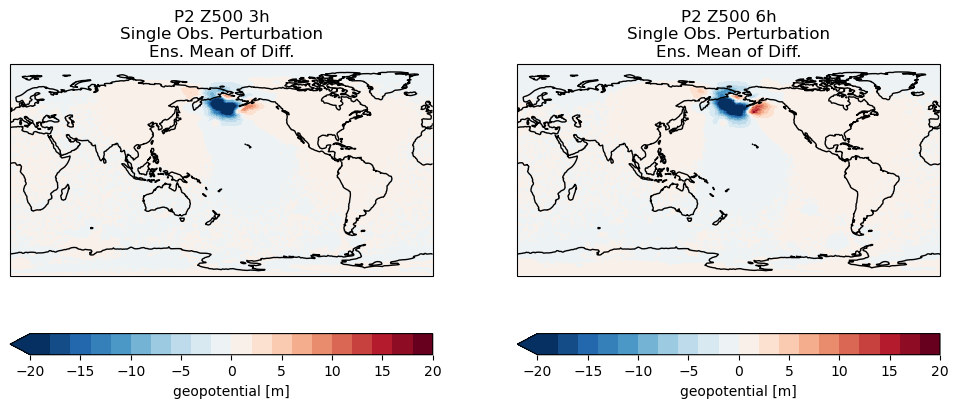

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=-180)})

for time, ax in zip(plotme.time.values, axs):
    p = plotme.sel(time=time).plot(
        cbar_kwargs={"orientation":"horizontal"},
        cmap=cmap,
        ax=ax,
        transform=ccrs.PlateCarree(),
        vmin=-20,
        vmax=20,
    )
    ax.coastlines()
    fhr = int(time / 1e9 / 3600)
    ax.set(title=f"P2 Z500 {fhr}h\nSingle Obs. Perturbation\nEns. Mean of Diff.")
fig.savefig("p2_perturbation_z500.jpeg", bbox_inches="tight", dpi=300)

## Vertical Profiles

In [44]:
vprof = pds.geopotential.diff("experiment").mean("member").mean("lon", skipna=True)
vprof = vprof / 9.80665
vprof.attrs["units"] = "m"

In [45]:
vprof = vprof.squeeze()
vprof.load();

In [48]:
cmap = plt.get_cmap("RdBu_r", lut=24)

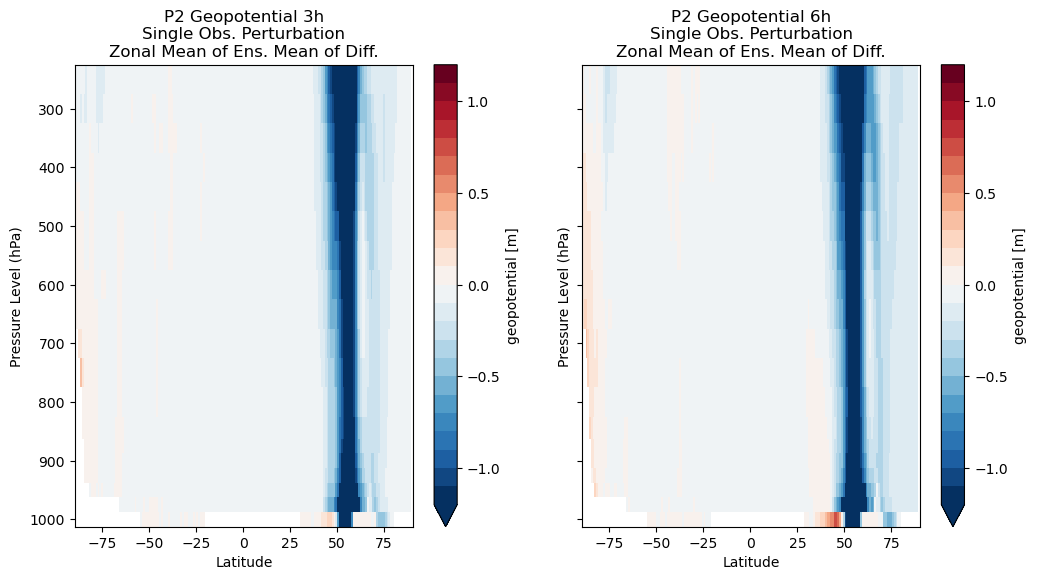

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), sharey=True)

for time, ax in zip(plotme.time.values, axs):
    
    vprof.sel(time=time).plot(
        ax=ax,
        x="lat",
        vmin=-1.2,
        vmax=1.2,
        cmap=cmap,
        yincrease=False,
    )
    fhr = int(time / 1e9 / 3600)
    ax.set(title=f"P2 Geopotential {fhr}h\nSingle Obs. Perturbation\nZonal Mean of Ens. Mean of Diff.",
           xlabel="Latitude",
           ylabel="Pressure Level (hPa)",
          )
fig.savefig("p2_perturbation_vertical.jpeg", bbox_inches="tight", dpi=300)